In [48]:
#TODO: Heat map to represent all model adjust
#TODO: try to explore data with each variable and their combinations
#TODO considerar usar la salida del PCA en una futura red neuronal

# Analysis example: Source code 
# https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501  (Profe Walter)

In [49]:
from scipy.io import loadmat 
import pandas as pd 
import numpy as np

In [50]:
mat = loadmat("./data/db1000.mat")
secureConditionLabels = mat['issecure']   # 1 the load flow convergences; 0 the load flow doesnt convergence (Juan Sierra)
# Todo: considerar el porcentaje de cobertura de datos con PCA
# estadística multivariable de Daniel Peña

voltageMagnitudes = mat['VM']   # type: ndarray
voltageAngles = mat['VA']       # type: ndarraya

# TODO: then
# reactiveGenerators = mat['Qgen']
# activeGenerators = mat['Pgen']

# TODO: Ask to Juan how can i interpret SLOAD?
# areactiveLoads = mat['Qload']   
# activeLoads = mat['Pload']

# dimensions of data
# generación vs etiqueta
# carga vs etiqueta


In [51]:
print('Data dimensions :: ')
print('secureConditionLabels: ', secureConditionLabels.shape)
print('voltageMagnitudes: ', voltageMagnitudes.shape)
print('voltageAngles: ', voltageAngles.shape)

voltageMagAng = np.concatenate((voltageMagnitudes, voltageAngles), axis = 0)
print('voltages and angles in the same variable: ', voltageMagAng.shape)

Data dimensions :: 
secureConditionLabels:  (1, 1000)
voltageMagnitudes:  (39, 1000)
voltageAngles:  (39, 1000)
voltages and angles in the same variable:  (78, 1000)


In [52]:
secureConditionLabels = secureConditionLabels.reshape((secureConditionLabels.shape[1], secureConditionLabels.shape[0]))
voltageMagnitudes = voltageMagnitudes.reshape((voltageMagnitudes.shape[1], voltageMagnitudes.shape[0]))
voltageAngles = voltageAngles.reshape((voltageAngles.shape[1], voltageAngles.shape[0]))
voltageMagAng = voltageMagAng.reshape((voltageMagAng.shape[1], voltageMagAng.shape[0]))

print('Data dimensions :: ')
print('secureConditionLabels: ', secureConditionLabels.shape)
print('voltageMagnitudes: ', voltageMagnitudes.shape)
print('voltageAngles: ', voltageAngles.shape)

voltageMagAng = np.concatenate((voltageMagnitudes, voltageAngles), axis = 1)
print('voltages and angles in the same variable: ', voltageMagAng.shape)


Data dimensions :: 
secureConditionLabels:  (1000, 1)
voltageMagnitudes:  (1000, 39)
voltageAngles:  (1000, 39)
voltages and angles in the same variable:  (1000, 78)


In [53]:
# note that the mean and his variance per node is similar, in this case, the data are similar and don't failures per node or 
# these data are in the same conditions???????
# there are conditions out of voltage stability VMax > 1.1

# secureConditionLabels 
# voltageMagnitudes 
# voltageAngles 
# voltageMagAng 

selectSet = 1

if selectSet == 0:
    toDescribe = pd.DataFrame(voltageMagnitudes)
    data = voltageMagnitudes.copy()
if selectSet == 1:
    toDescribe = pd.DataFrame(voltageAngles)
    data = voltageAngles.copy()
if selectSet == 2:
    toDescribe = pd.DataFrame(voltageMagAng)
    data = voltageMagAng.copy()


toDescribe.describe()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.037087,0.778914,0.589131,0.760822,0.552301,1.125016,0.837000,0.898197,1.036172,0.788992,...,0.472101,0.888979,1.095552,0.802861,1.011001,0.871382,1.037382,1.046484,0.759427,0.927279
std,11.489471,11.129029,11.445971,11.377739,11.168224,11.776869,11.996915,11.598204,11.783490,11.613967,...,11.511909,11.785836,11.485855,12.127379,12.024855,11.311943,11.976882,11.900558,10.985911,11.232067
min,-41.608860,-44.414451,-57.773197,-37.161710,-41.251162,-47.322717,-52.035599,-46.341756,-35.036449,-39.910236,...,-51.488878,-45.234584,-44.414451,-57.773197,-43.852256,-39.375909,-43.501672,-44.659254,-43.393217,-42.097017
25%,-4.248051,-4.348378,-4.607630,-4.520780,-4.696511,-4.346425,-4.748844,-4.716499,-4.289681,-5.396409,...,-4.843165,-4.743224,-4.267486,-4.702804,-4.526977,-4.851861,-4.416006,-4.193068,-4.589957,-4.349134
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.724822,5.603818,5.155683,4.873051,4.939949,6.630247,5.233539,5.405628,5.822427,5.631853,...,4.849769,5.302441,6.173771,5.365174,5.829982,5.208297,5.377155,6.069041,6.236991,5.827805
max,46.207577,45.263698,49.264645,39.806165,42.421847,47.616579,52.116817,47.958161,45.011240,48.316788,...,46.705469,48.038183,49.970605,52.455588,47.323050,45.726592,47.551510,46.566531,41.745942,48.173829


In [54]:
# TODO:  
# Disperse analysis


In [55]:
# Correlation matrix: Which variables or nodes influence the convergence of load flow?
# PCA
# https://www.cienciadedatos.net/documentos/py19-pca-python.html
# para el primer pca quienes no aportan tanto, esos son los que llevan las menores influencias

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')



In [56]:
# Entrenamiento modelo PCA 
# TODO: con escalado de los datos
# ==============================================================================
n_components_local = 6

modelo_pca = PCA(n_components=n_components_local)  #try n_components=4
modelo_pca.fit(data)

# TODO: performance metrics



PCA(n_components=6)

In [57]:
# Se combierte el array a dataframe para añadir nombres a los ejes.  
indexLabel = ['PC' + str(k) for k in range(1, n_components_local+1)]
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = toDescribe.columns,
    index   = indexLabel
)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
PC1,0.155896,0.151842,0.155007,0.148158,0.148830,0.166209,0.162899,0.158366,0.165536,0.155802,...,0.155484,0.168654,0.154261,0.170290,0.176682,0.153223,0.164790,0.165015,0.154681,0.154886
PC2,-0.030465,-0.118595,-0.069248,0.218771,0.100774,-0.143183,-0.249940,-0.199237,0.172866,-0.258295,...,0.047246,0.073638,-0.064548,-0.112078,0.081568,-0.252805,-0.002231,0.477119,-0.014714,0.087054
PC3,-0.094384,0.151760,-0.124536,-0.024708,0.112325,0.024925,-0.268355,0.071818,-0.216705,0.132896,...,0.272832,0.038477,0.265163,-0.188473,0.133008,-0.107473,-0.055613,0.023601,0.109622,-0.093456
PC4,0.054796,0.039496,-0.077319,0.116680,0.101052,0.031882,0.199437,0.219046,-0.077478,-0.325599,...,0.348904,-0.081106,-0.212239,-0.307993,0.148809,-0.040802,0.143548,-0.053978,-0.036853,-0.069100
PC5,-0.108339,-0.334108,-0.295233,0.076758,-0.076819,0.254190,0.234832,-0.048668,-0.177316,0.070745,...,0.045708,-0.053071,0.299011,0.224902,0.219451,-0.283906,-0.032259,-0.029018,-0.010726,-0.014691
PC6,0.125851,0.107562,-0.042705,0.079887,-0.170680,-0.121780,-0.252973,0.091767,-0.129999,0.003480,...,-0.100962,0.033882,-0.167091,-0.095166,0.013156,-0.182559,0.423351,-0.113164,0.042667,0.091808


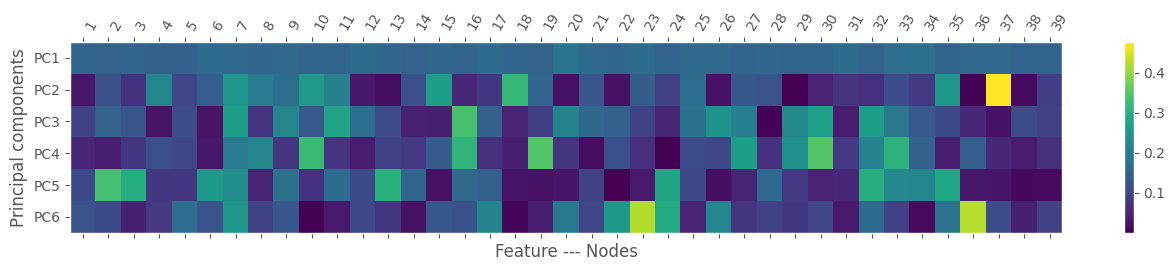

In [58]:
# Heatmap componentes
# TODO: test with abs(modelo_pca.componets_), becouse the decomposition near to zero are depreciated
# ==============================================================================
# plt.matshow(modelo_pca.components_, cmap='viridis', aspect='auto')
plt.matshow(abs(modelo_pca.components_), cmap='viridis', aspect='auto')
plt.yticks(range(len(indexLabel)), indexLabel)
plt.xticks(range(len(toDescribe.columns)), list(np.arange(1, len(toDescribe.columns) + 1, 1)), rotation= 60, ha="left")
plt.grid(False)
plt.xlabel("Feature --- Nodes")
plt.ylabel ("Principal components")
plt.colorbar()



[-0.00000000e+00  5.93984003e-04  0.00000000e+00 -2.59204019e-04
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  2.79025134e-03
 -1.22604974e-03 -0.00000000e+00 -0.00000000e+00  4.76986551e-04
  0.00000000e+00  6.12938367e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.21291468e-03  5.08057176e-07
 -0.00000000e+00 -6.85384448e-04 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
[0.77282812]


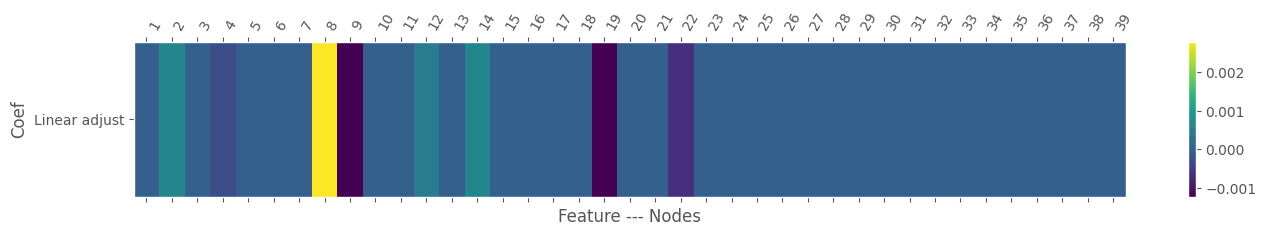

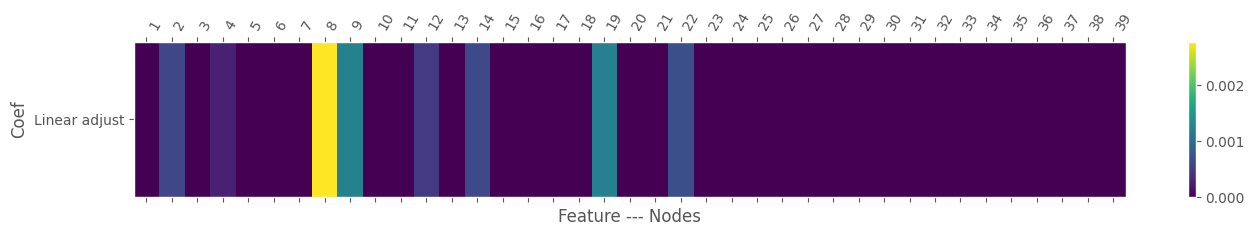

In [59]:
# Lasso regresion: Which variables or nodes influence the convergence of load flow?
#TODO: create function to identify nodes that dont influence convergence of load flow

# controlling regularization strength
alphaLasso = 0.15 # 0.09
# (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

from sklearn import linear_model
clfModel = linear_model.Lasso(alpha=alphaLasso)

clfModel.fit(data, secureConditionLabels)

print(clfModel.coef_)

print(clfModel.intercept_)

# TODO: Graficar este como mapa de calor
# Heatmap componentes
# TODO: test with abs, becouse the decomposition near to zero are depreciated
# ==============================================================================
plt.matshow([clfModel.coef_], cmap='viridis', aspect='auto')
plt.yticks([0], ["Linear adjust"])
plt.xticks(range(len(toDescribe.columns)), list(np.arange(1, len(toDescribe.columns)+1, 1)), rotation= 60, ha="left")
plt.grid(False)
plt.xlabel("Feature --- Nodes")
plt.ylabel ("Coef")
plt.colorbar();

plt.matshow([abs(clfModel.coef_)], cmap='viridis', aspect='auto')
plt.yticks([0], ["Linear adjust"])
plt.xticks(range(len(toDescribe.columns)), list(np.arange(1, len(toDescribe.columns)+1, 1)), rotation= 60, ha="left")
plt.grid(False)
plt.xlabel("Feature --- Nodes")
plt.ylabel ("Coef")
plt.colorbar();


# TODO: performance metrics


# TODO: LogisticRegression


In [60]:
# clfVoltageAngle= linear_model.Lasso(alpha=alphaLasso)
# clfVoltageAngle.fit(voltageAngles, secureConditionLabels)

# print(clfVoltageAngle.coef_)

# print(clfVoltageAngle.intercept_)

In [61]:
# clfVoltage= linear_model.Lasso(alpha=alphaLasso)
# clfVoltage.fit(voltageMagAng, secureConditionLabels)

# print(clfVoltage.coef_)

# print(clfVoltage.intercept_)

In [62]:
# Supervised analysis 



In [63]:
# unsupervised analysis
